In [111]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time

In [112]:
L = 256
dx = 0.1
dt = 0.1
tspan = 1000
nloops = int(tspan/dt)
N = int(L/dx)

In [113]:
# Read parameters
f = open("../state.dat", "r")
row = f.readline()
N, tmax, dx = row.split(" ")
N = int(N)
dx = float(dx)
L = N*dx
f = open("../fileCout.dat", "r")
row = f.readline()
t0, Cdt = row.split(" ")
row = f.readline()
t1, C2dt = row.split(" ")
dt_simulation = float(t1) - float(t0)



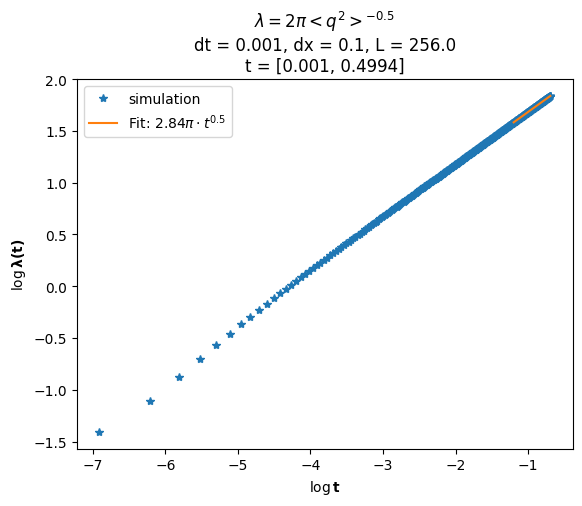

In [114]:
f = open("../fileQ2.dat", "r")
tt = np.zeros(nloops)
q2 = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    q2[i] = float(b)
    lam[i] = 2*np.pi/np.sqrt(q2[i])
    if i == 2:
        dt = tt[i] - tt[i-1]
    i = i + 1
tt = tt[0:i]
q2 = q2[0:i]
lam = lam[0:i]

# Select plot timespan
tmin = 0.3
tmax = 0.5
imin = int((tmin-tt[0])/dt)
imax = int((tmax-tt[0])/dt)
#imin = 0
#imax = i
#tmax = int(1000/dt)
# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lam = np.log(lam)
# Linear fit
c = np.polyfit(log_tt[imin:imax-1], log_lam[imin:imax-1], 1)
# Fitted line
#fit_xx = tt[1:len(tt)]
#fit_yy = np.exp(c[1])*np.ones(len(fit_xx)) + np.power(fit_xx, c[0])
fit_xx = log_tt[imin:imax-1]
fit_yy = c[1]*np.ones(len(fit_xx)) + c[0]*fit_xx

f, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'*', label="simulation")
title = "$\lambda = 2\pi <q^2>^{-0.5}$\ndt = " + str(dt_simulation) + ", dx = " + str(dx) + ", L = " + str(L) + "\nt = [" + str(tt[0]) + ", " + str(tt[len(tt)-1]) + "]"
ax.set_title(title)
ax.set_xlabel("$\log \mathbf{t}$")
ax.set_ylabel("$\log \mathbf{\lambda(t)}$")
# Plot fit line
cifers = 2

prefactor = round(np.exp(c[1])/np.pi,cifers)
ax.plot(fit_xx, fit_yy,'-', label="Fit: $" + str(prefactor) + "\pi \cdot t^{" + str(round(c[0], cifers)) + "}$")
#ax.set_xlim(np.log(tmin),np.log(tmax))
ax.legend()

In [115]:
log_tt

array([-6.90775528, -6.2146081 , -5.80914299, -5.52146092, -5.29831737,
       -5.11433053, -4.96041758, -4.82706452, -4.70942021, -4.60417069,
       -4.50895133, -4.42201564, -4.34203699, -4.26798392, -4.19903863,
       -4.13391734, -4.07336616, -4.01627303, -3.96226422, -3.91102351,
       -3.86228091, -3.81580415, -3.77139188, -3.72886846, -3.68807977,
       -3.64850556, -3.61080792, -3.57447991, -3.5394255 , -3.5055584 ,
       -3.4728008 , -3.44108232, -3.41033904, -3.38051279, -3.35155044,
       -3.32312585, -3.29575687, -3.26911704, -3.24316852, -3.21787632,
       -3.19320808, -3.16913373, -3.14562536, -3.12265697, -3.1002043 ,
       -3.07802752, -3.05654441, -3.03551314, -3.01491509, -2.99473277,
       -2.97494973, -2.95555048, -2.93652041, -2.91784573, -2.89951342,
       -2.88133273, -2.86365193, -2.84627832, -2.8292014 , -2.81241122,
       -2.79589829, -2.77965362, -2.76366862, -2.74793513, -2.73244536,
       -2.71704049, -2.70201843, -2.68721869, -2.6726348 , -2.65

In [116]:
tt

array([0.001  , 0.002  , 0.003  , 0.004  , 0.005  , 0.00601, 0.00701,
       0.00801, 0.00901, 0.01001, 0.01101, 0.01201, 0.01301, 0.01401,
       0.01501, 0.01602, 0.01702, 0.01802, 0.01902, 0.02002, 0.02102,
       0.02202, 0.02302, 0.02402, 0.02502, 0.02603, 0.02703, 0.02803,
       0.02903, 0.03003, 0.03103, 0.03203, 0.03303, 0.03403, 0.03503,
       0.03604, 0.03704, 0.03804, 0.03904, 0.04004, 0.04104, 0.04204,
       0.04304, 0.04404, 0.04504, 0.04605, 0.04705, 0.04805, 0.04905,
       0.05005, 0.05105, 0.05205, 0.05305, 0.05405, 0.05505, 0.05606,
       0.05706, 0.05806, 0.05906, 0.06006, 0.06106, 0.06206, 0.06306,
       0.06406, 0.06506, 0.06607, 0.06707, 0.06807, 0.06907, 0.07007,
       0.07107, 0.07207, 0.07307, 0.07407, 0.07507, 0.07608, 0.07708,
       0.07808, 0.07908, 0.08008, 0.08108, 0.08208, 0.08308, 0.08408,
       0.08508, 0.08609, 0.08709, 0.08809, 0.08909, 0.09009, 0.09109,
       0.09209, 0.09309, 0.09409, 0.09509, 0.0961 , 0.0971 , 0.0981 ,
       0.0991 , 0.10

In [117]:
str(tt[len(tt)-1])

'0.4994'

In [118]:
f = open("../fileGrad2.dat", "r")
tt = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    lam[i] = float(b)
    if i == 2:
        dt = tt[i] - tt[i-1]
    i = i + 1
tt = tt[0:i]
lam = lam[0:i]

# Select region to plot
tmin = 15
tmax = 100
imin = int((tmin-tt[0])/dt)
imax = int((tmax-tt[0])/dt)
#imin = 1
#imax = i

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lam = np.log(lam)
# Linear fit
c = np.polyfit(log_tt[imin:imax-1], log_lam[imin:imax-1], 1)
# Fitted line
#fit_xx = tt[1:len(tt)]
#fit_yy = np.exp(c[1])*np.ones(len(fit_xx)) + np.power(fit_xx, c[0])
fit_xx = log_tt[imin:imax-1]
fit_yy = c[1]*np.ones(len(fit_xx)) + c[0]*fit_xx

f, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'*', label="simulation")
title = "$\lambda = \int |\\nabla u|^2 dx$\ndt = " + str(dt) + ", dx = " + str(dx) + ", L = " + str(L) + "\nt = [" + str(tt[0]) + ", " + str(tt[len(tt)-1]) + "]"
ax.set_title(title)
ax.set_xlabel("$\log \mathbf{t}$")
ax.set_ylabel("$\log \mathbf{\lambda(t)}$")
# Plot fit line
cifers = 3
ax.plot(fit_xx, fit_yy,'--', label="Fit: $" + str(round(c[1],cifers)) + "\cdot t^{" + str(round(c[0], cifers)) + "}$")
ax.legend()

TypeError: expected non-empty vector for x

In [ ]:
tt

array([0.3   , 1.2   , 2.1   , ..., 0.4975, 0.4985, 0.4995])

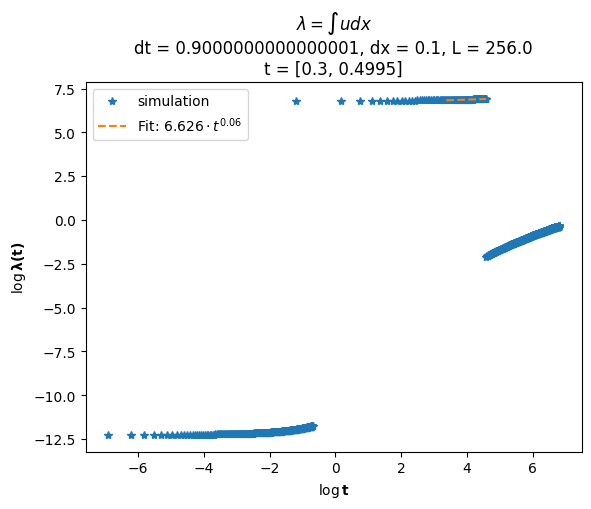

In [ ]:
f = open("../fileAveout.dat", "r")
tt = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    lam[i] = float(b)
    if i == 2:
        dt = tt[i] - tt[i-1]
    i = i + 1
tt = tt[0:i]
lam = lam[0:i]

# Select region to plot
tmin = 30
tmax = 100
imin = int((tmin-tt[0])/dt)
imax = int((tmax-tt[0])/dt)
#imin = 1
#imax = i

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lam = np.log(lam)
# Linear fit
c = np.polyfit(log_tt[imin:imax-1], log_lam[imin:imax-1], 1)
# Fitted line
#fit_xx = tt[1:len(tt)]
#fit_yy = np.exp(c[1])*np.ones(len(fit_xx)) + np.power(fit_xx, c[0])
fit_xx = log_tt[imin:imax-1]
fit_yy = c[1]*np.ones(len(fit_xx)) + c[0]*fit_xx

f, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'*', label="simulation")
title = "$\lambda = \int u dx$\ndt = " + str(dt) + ", dx = " + str(dx) + ", L = " + str(L) + "\nt = [" + str(tt[0]) + ", " + str(tt[len(tt)-1]) + "]"
ax.set_title(title)
ax.set_xlabel("$\log \mathbf{t}$")
ax.set_ylabel("$\log \mathbf{\lambda(t)}$")
# Plot fit line
cifers = 3
ax.plot(fit_xx, fit_yy,'--', label="Fit: $" + str(round(c[1],cifers)) + "\cdot t^{" + str(round(c[0], cifers)) + "}$")
ax.legend()

In [ ]:
grad2

NameError: name 'grad2' is not defined